## Dataset Exploration <a id="dataset-exploration"></a>

Import the Pandas software library. Pandas can be used to make datasets clean and process datasets.

In [13]:
# import the required python libraries
import pandas as pd

Read in the source data CSV file.

In [14]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

Using Pandas the column names can be renamed to make them python friendly.

In [15]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

In [16]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

In [17]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.694663,5.188202,81.098315,17.388483,7.170506,11.589916,7.444382,17.445506,1012.151685
std,1.109269,2.966427,5.646277,6.571938,4.910919,5.112865,4.695277,6.499136,12.948221
min,0.000000,0.000000,60.000000,3.400000,-5.800000,-1.750000,-5.800000,3.400000,977.000000
25%,0.800000,3.000000,78.000000,11.775000,3.675000,7.730000,4.100000,11.800000,1004.375000
50%,1.500000,4.600000,81.000000,17.450000,7.600000,11.790000,7.750000,17.450000,1013.350000
75%,2.300000,6.700000,85.000000,23.100000,11.200000,15.517500,11.200000,23.100000,1020.650000
max,5.500000,15.600000,94.000000,32.800000,17.800000,22.510000,17.800000,32.800000,1045.200000


In [18]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
winter_rows = winter.shape[0]
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
spring_rows = spring.shape[0]
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
summer_rows = summer.shape[0]
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)
autumn_rows = summer.shape[0]

Manage null values by replacing them with the median value.

In [20]:
# replace nan values with the median - Zach (2022). The model could be unreliable if null values are not managed (Tamboli, 2021) 
autumn = autumn.fillna(autumn.median(numeric_only=True))

# check na values
autumn.isnull().sum()

date_time                         0
wind_speed_m_s                    0
gust_m_s                          0
humidity_%                        0
chill_celsius                     0
chill_minimum_celsius             0
temperature_average_celsius       0
temperature_range_low_celsius     0
temperature_range_high_celsius    0
outside_air_pres_hPa              0
dtype: int64

### Wind Speed <a id="wind-speed"></a>

Plotting histograms of the distribution of the wind speeds assists with fitting a probability distribution model.

In [21]:
from scipy import stats

winter_loc, winter_scale = stats.rayleigh.fit(winter['wind_speed_m_s'])
spring_loc, spring_scale = stats.rayleigh.fit(spring['wind_speed_m_s'])
summer_loc, summer_scale = stats.rayleigh.fit(summer['wind_speed_m_s'])
autumn_loc, autumn_scale = stats.rayleigh.fit(autumn['wind_speed_m_s'])

/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()


Once the location and fit parameters are known they can be used to plot the probability density function over a histogram of the dataset in order to give a visual representation of the fit of the Rayleigh probability distribution function.

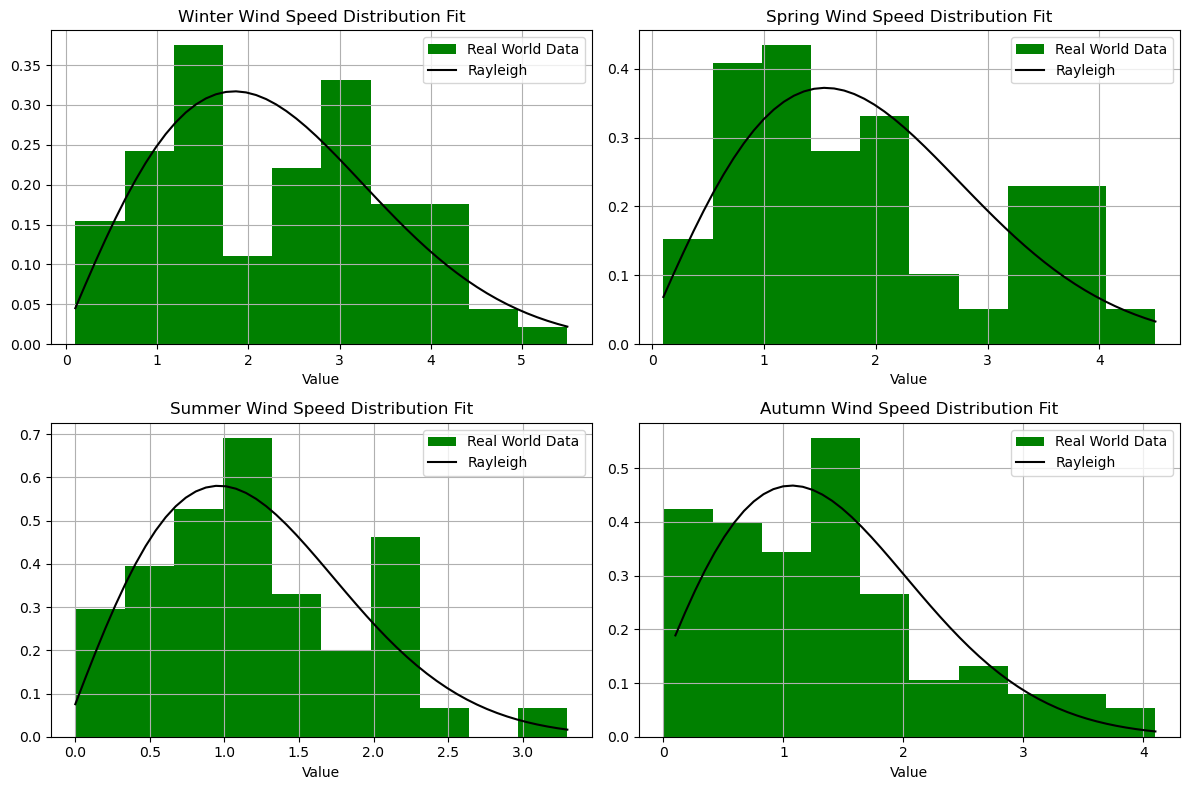

In [22]:
# code adapted from https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

winter_xl = np.linspace(winter['wind_speed_m_s'].min(), winter['wind_speed_m_s'].max())
spring_xl = np.linspace(spring['wind_speed_m_s'].min(), spring['wind_speed_m_s'].max())
summer_xl = np.linspace(summer['wind_speed_m_s'].min(), summer['wind_speed_m_s'].max())
autumn_xl = np.linspace(winter['wind_speed_m_s'].min(), autumn['wind_speed_m_s'].max())

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

# Display Results:
fig, axe = plt.subplots(2, 2)

axe[0, 0].hist(winter['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0, 0].plot(winter_xl,stats.rayleigh(scale=winter_scale, loc=winter_loc).pdf(winter_xl), label="Rayleigh", color='black')
axe[0, 0].set_title("Winter Wind Speed Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()

axe[0, 1].hist(spring['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0, 1].plot(spring_xl,stats.rayleigh(scale=spring_scale, loc=spring_loc).pdf(spring_xl), label="Rayleigh", color='black')
axe[0, 1].set_title("Spring Wind Speed Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()

axe[1, 0].hist(summer['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1, 0].plot(summer_xl,stats.rayleigh(scale=summer_scale, loc=summer_loc).pdf(summer_xl), label="Rayleigh", color='black')
axe[1, 0].set_title("Summer Wind Speed Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()

axe[1, 1].hist(autumn['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1, 1].plot(autumn_xl,stats.rayleigh(scale=autumn_scale, loc=autumn_loc).pdf(autumn_xl), label="Rayleigh", color='black')
axe[1, 1].set_title("Autumn Wind Speed Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()

Wind speed appears to be more widely distributed over a greater range in winter and spring than in the summer and autumn with a higher frequency of lower speeds vs higher speeds. The appearance of the distributions is similar to "standard" bell curve, however the distribution appears to be shifted to the right which is more consistent with the characteristics of a Rayleigh distribution

In [40]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", 'rayleigh', 'gamma', 'uniform', 'lognorm', 'logistic', 'gumbel_r', 'gumbel_l']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(winter['wind_speed_m_s'])

p value for norm = 0.23228918214908179


p value for exponweib = 0.6821732124385185
p value for weibull_max = 0.38566129228605156
p value for weibull_min = 0.3134560144469311
p value for pareto = 0.0036801920766574526
p value for genextreme = 0.38554702715412487
p value for rayleigh = 0.30027905452371295
p value for gamma = 0.21394575293435766
p value for uniform = 0.0015612000163419074
p value for lognorm = 0.2789986909420752
p value for logistic = 0.2589133152371838
p value for gumbel_r = 0.18104920664171462
p value for gumbel_l = 0.18902271045855537
Best fitting distribution: exponweib
Best p value: 0.6821732124385185
Parameters for the best fit: (0.27503724293176923, 4.5263439574972955, 0.08118342282389561, 3.839729030711695)


('exponweib',
 0.6821732124385185,
 (0.27503724293176923,
  4.5263439574972955,
  0.08118342282389561,
  3.839729030711695))

In [ ]:
print(winter.describe())

[0.02474356 0.03766758 0.05059161 0.06351563 0.07643965 0.08936367
 0.10228769 0.11521171 0.12813573 0.14105975 0.15398377 0.16690779
 0.17983181 0.19275584 0.20567986 0.21860388 0.2315279  0.24445192
 0.25737594 0.27029996 0.28322398 0.296148   0.30907202 0.32199604
 0.33492007 0.34784409 0.36076811 0.37369213 0.38661615 0.39954017
 0.41246419 0.42538821 0.43831223 0.45123625 0.46416027 0.4770843
 0.49000832 0.50293234 0.51585636 0.52878038 0.5417044  0.55462842
 0.56755244 0.58047646 0.59340048 0.6063245  0.61924853 0.63217255
 0.64509657 0.65802059 0.67094461 0.68386863 0.69679265 0.70971667
 0.72264069 0.73556471 0.74848873 0.76141276 0.77433678 0.7872608
 0.80018482 0.81310884 0.82603286 0.83895688 0.8518809  0.86480492
 0.87772894 0.89065296 0.90357699 0.91650101 0.92942503 0.94234905
 0.95527307 0.96819709 0.98112111 0.99404513 1.00696915 1.01989317
 1.0328172  1.04574122 1.05866524 1.07158926 1.08451328 1.0974373
 1.11036132 1.12328534 1.13620936 1.14913338 1.1620574  1.1749814

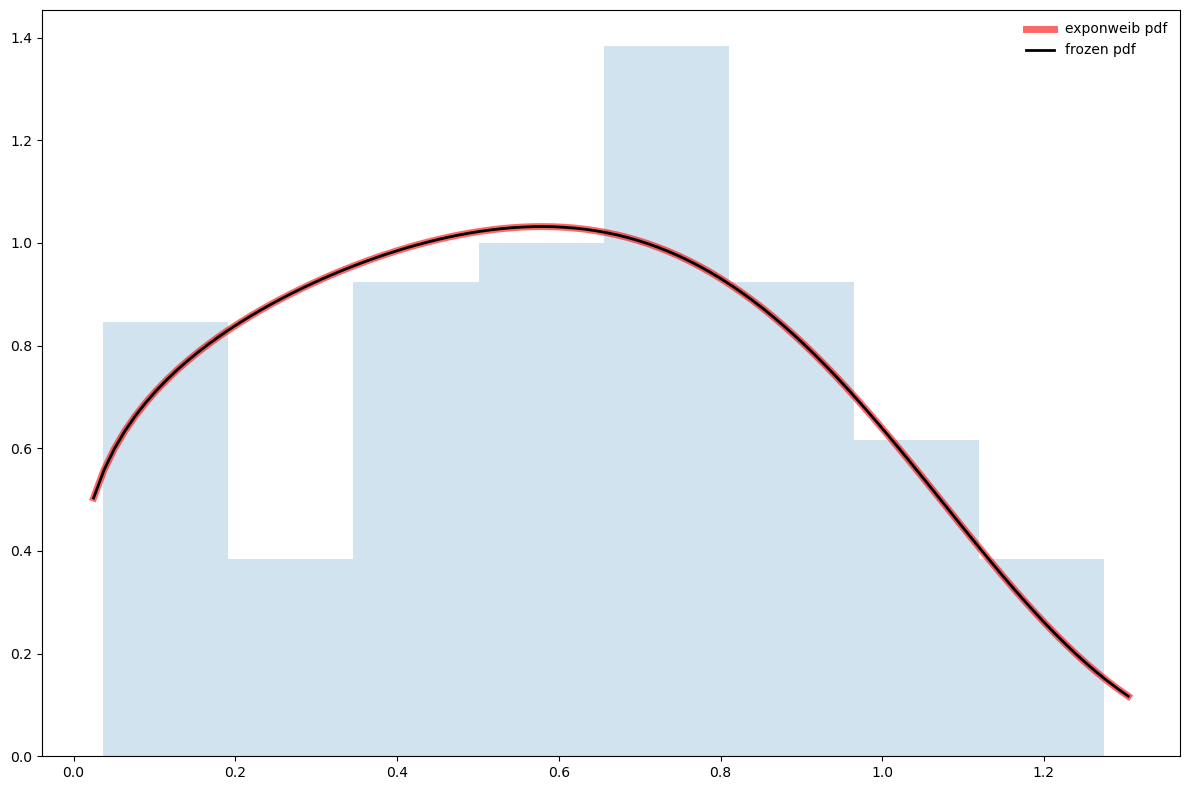

In [38]:
from scipy.stats import exponweib
fig, ax = plt.subplots(1, 1)

a, c = 0.27503724293176923, 4.5263439574972955

x = np.linspace(exponweib.ppf(.01, a, c), exponweib.ppf(.99, a, c), 100)

print(x)

ax.plot(x, exponweib.pdf(x, a, c), 'r-', lw=5, alpha=0.6, label='exponweib pdf')

rv = exponweib(a, c)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = exponweib.rvs(0.27503724293176923, 4.5263439574972955, size=winter_rows)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

#ax.set_xlim(x[0], x[-1])

ax.legend(loc='best', frameon=False)

plt.show()



In [ ]:
import seaborn as sns


The Raleigh distributions are generated and the histograms are plotted.

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(2)

# draw randomly from rayleigh distributions for each season
model_ws_winter = np.random.rayleigh(winter_scale, winter_rows)
model_ws_spring = np.random.rayleigh(spring_scale, spring_rows)
model_ws_summer = np.random.rayleigh(summer_scale, summer_rows)
model_ws_autumn = np.random.rayleigh(autumn_scale, autumn_rows)

Histograms of the generated wind speed data can be plotted.

In [ ]:
fig, axis = plt.subplots(2, 2)
axis[0, 0].hist(model_ws_winter, color = 'grey', edgecolor = 'black', bins=15)
axis[0, 0].set_title("Wind Speed Model Winter")
axis[0, 0].set(xlabel='wind_speed_m_s', ylabel='count')
axis[0, 1].hist(model_ws_spring, color = 'grey', edgecolor = 'black', bins=15)
axis[0, 1].set_title("Wind Speed Model Spring")
axis[0, 1].set(xlabel='wind_speed_m_s', ylabel='count')
axis[1, 0].hist(model_ws_summer, color = 'grey', edgecolor = 'black', bins=15)
axis[1, 0].set_title("Wind Speed Model Summer")
axis[1, 0].set(xlabel='wind_speed_m_s', ylabel='count')
axis[1, 1].hist(model_ws_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[1, 1].set_title("Wind Speed Model Autumn")
axis[1, 1].set(xlabel='wind_speed_m_s', ylabel='count')
plt.suptitle('Seasonal Wind Speed Models', fontsize = 20)
plt.show()

The histograms from the generated data have a similar appearance to the wind speed data in the dataset.

### Gust Speed <a id="gust-speed"></a>

As the gust speed variable is a measure of wind variations over time it can be modelled in the same as wind speed using Rayleigh distribution. 

Calculate the Rayleigh parameters (location and scale), for each season, using the 'fit()' method.

In [ ]:
winter_gust_loc, winter_gust_scale = stats.rayleigh.fit(winter['gust_m_s'])
spring_gust_loc, spring_gust_scale = stats.rayleigh.fit(spring['gust_m_s'])
summer_gust_loc, summer_gust_scale = stats.rayleigh.fit(summer['gust_m_s'])
autumn_gust_loc, autumn_gust_scale = stats.rayleigh.fit(autumn['gust_m_s'])

Plot the Raleigh distribution and overlay the PDF in order to get a visual illustration of the model fit.

In [ ]:
winter_gust_xl = np.linspace(winter['gust_m_s'].min(), winter['gust_m_s'].max())
spring_gust_xl = np.linspace(spring['gust_m_s'].min(), spring['gust_m_s'].max())
summer_gust_xl = np.linspace(summer['gust_m_s'].min(), summer['gust_m_s'].max())
autumn_gust_xl = np.linspace(winter['gust_m_s'].min(), autumn['gust_m_s'].max())

# Display Results:
fig, axe = plt.subplots(2, 2)
axe[0, 0].hist(winter['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0, 0].plot(winter_gust_xl,stats.rayleigh(scale=winter_gust_scale, loc=winter_gust_loc).pdf(winter_gust_xl), label="Rayleigh", color='black')
axe[0, 0].set_title("Winter Gust Speed Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()

axe[0, 1].hist(spring['gust_m_s'],density=1, label="Real World Data", color='green')
axe[0, 1].plot(spring_gust_xl,stats.rayleigh(scale=spring_gust_scale, loc=spring_gust_loc).pdf(spring_gust_xl), label="Rayleigh", color='black')
axe[0, 1].set_title("Spring Gust Speed Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()

axe[1, 0].hist(summer['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1, 0].plot(summer_gust_xl,stats.rayleigh(scale=summer_gust_scale, loc=summer_gust_loc).pdf(summer_gust_xl), label="Rayleigh", color='black')
axe[1, 0].set_title("Summer Gust Speed Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()

axe[1, 1].hist(autumn['gust_m_s'],density=1, label="Real World Data", color='green')
axe[1, 1].plot(autumn_gust_xl,stats.rayleigh(scale=autumn_gust_scale, loc=autumn_gust_loc).pdf(autumn_gust_xl), label="Rayleigh", color='black')
axe[1, 1].set_title("Autumn Gust Speed Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

# draw randomly from rayleigh distributions for each season
model_gust_winter = np.random.rayleigh(winter_gust_scale, winter_rows)
model_gust_spring = np.random.rayleigh(spring_gust_scale, spring_rows)
model_gust_summer = np.random.rayleigh(summer_gust_scale, summer_rows)
model_gust_autumn = np.random.rayleigh(autumn_gust_scale, autumn_rows)

fig, axis = plt.subplots(2, 2)
axis[0, 0].hist(model_gust_winter, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 0].set_title("Gust Speed Model Winter")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(model_gust_spring, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 1].set_title("Gust Speed Model Spring")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(model_gust_summer, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 0].set_title("Gust Speed Model Summer")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(model_gust_autumn, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 1].set_title("Gust Speed Model Autumn")
axis[1, 1].set(xlabel='value', ylabel='count')
plt.suptitle('Seasonal Gust Speed Models', fontsize = 20)

Compare the KDE of the real world data and the modelled data.

### Humidity <a id="humidity"></a>

Literature suggests that the normal distribution is the best fit distribution for relative humidity probability modelling (Musa Esıt, 2022). Musa Esıt (2022) found that the normal distribution was the best probability fit for 2 out or 3 weather stations humidity data.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

In order to generate a sample of random normally distributed data the mean and standard deviation of the real world data are needed. Once these are known the data can be synthesised and histograms plotted.

In [ ]:
winter_normal_humidity = np.random.normal(winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'], size = winter_rows)
spring_normal_humidity = np.random.normal(spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'], size = spring_rows)
summer_normal_humidity = np.random.normal(summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'], size = summer_rows)
autumn_normal_humidity = np.random.normal(autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'], size = autumn_rows)


In [ ]:
winter_humidity_xl = np.linspace(winter.describe()['humidity_%']['min'], winter.describe()['humidity_%']['max'], winter_rows)
spring_humidity_xl = np.linspace(spring.describe()['humidity_%']['min'], spring.describe()['humidity_%']['max'], spring_rows)
summer_humidity_xl = np.linspace(summer.describe()['humidity_%']['min'], summer.describe()['humidity_%']['max'], summer_rows)
autumn_humidity_xl = np.linspace(autumn.describe()['humidity_%']['min'], autumn.describe()['humidity_%']['max'], autumn_rows)

In [ ]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

norm_winter_humidity_pdf = normal_dist(winter_humidity_xl, winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'])
norm_spring_humidity_pdf = normal_dist(spring_humidity_xl, spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'])
norm_summer_humidity_pdf = normal_dist(summer_humidity_xl, summer.describe()['humidity_%']['mean'], summer.describe()['humidity_%']['std'])
norm_autumn_humidity_pdf = normal_dist(autumn_humidity_xl, autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'])

In [ ]:
fig, axe = plt.subplots(2, 2)
axe[0, 0].hist(winter['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0, 0].plot(winter_humidity_xl, norm_winter_humidity_pdf, label="Normal", color='black')
axe[0, 0].set_title("Winter Humidity Distribution Fit")
axe[0, 0].set_xlabel("Value")
axe[0, 0].legend()
axe[0, 0].grid()

axe[0, 1].hist(spring['humidity_%'], label="Real World Data", color='green', bins=10)
axe[0, 1].plot(spring_humidity_xl, norm_spring_humidity_pdf, label="Normal", color='black')
axe[0, 1].set_title("Spring Humidity Distribution Fit")
axe[0, 1].set_xlabel("Value")
axe[0, 1].legend()
axe[0, 1].grid()

axe[1, 0].hist(summer['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1, 0].plot(summer_humidity_xl, norm_summer_humidity_pdf, label="Normal", color='black')
axe[1, 0].set_title("Summer Humidity Distribution Fit")
axe[1, 0].set_xlabel("Value")
axe[1, 0].legend()
axe[1, 0].grid()

axe[1, 1].hist(autumn['humidity_%'], label="Real World Data", color='green', bins=10)
axe[1, 1].plot(autumn_humidity_xl, norm_autumn_humidity_pdf, label="Normal", color='black')
axe[1, 1].set_title("Autumn Humidity Distribution Fit")
axe[1, 1].set_xlabel("Value")
axe[1, 1].legend()
axe[1, 1].grid()


In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

fig, axis = plt.subplots(2, 2)
axis[0, 0].hist(winter_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 0].set_title("Winter Humidity Model")
axis[0, 0].set(xlabel='value', ylabel='count')
axis[0, 1].hist(spring_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[0, 1].set_title("Spring Humidity Model")
axis[0, 1].set(xlabel='value', ylabel='count')
axis[1, 0].hist(summer_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 0].set_title("Summer Humidity Model")
axis[1, 0].set(xlabel='value', ylabel='count')
axis[1, 1].hist(autumn_normal_humidity, color = 'grey', edgecolor = 'black', bins=10)
axis[1, 1].set_title("Autumn Humidity Model")
axis[1, 1].set(xlabel='value', ylabel='count')
plt.suptitle('Seasonal Humidity Models', fontsize = 20)

### Chill <a id="chill"></a>

Wind chill is said to have a quasi-normal probability distribution  **ref


In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Chill - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Chill -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Chill - Summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Chill - Autumn")
axis[3].set(xlabel='value', ylabel='count')


In [ ]:
winter_normal_chill = np.random.normal(winter.describe()['chill_celsius']['mean'], winter.describe()['chill_celsius']['std'], size = winter_rows)
spring_normal_chill = np.random.normal(spring.describe()['chill_celsius']['mean'], spring.describe()['chill_celsius']['std'], size = spring_rows)
summer_normal_chill = np.random.normal(summer.describe()['chill_celsius']['mean'], summer.describe()['chill_celsius']['std'], size = summer_rows)
autumn_normal_chill = np.random.normal(autumn.describe()['chill_celsius']['mean'], autumn.describe()['chill_celsius']['std'], size = autumn_rows)


In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Winter Chill Model")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Spring Chill Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Summer Chill Model")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Autumn Chill Model")
axis[3].set(xlabel='value', ylabel='count')

## Modelled Dataset <a id="modelled-dataset"></a>

Using the `pd.date_range()` method the time_series from the real world dataset can be created.

In [ ]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 13 Nov. 2023].
dti = pd.date_range(start="2022-11-09", end='2023-10-31')


A new Pandas DataFrame is created and the generated time series is set as the index.

In [ ]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti, columns = column_rename)
print(synthesised_dataset)

Concatenate the seasonal data for each variable into to one array and assign a variable for the array that corresponds to the modelled variable.

In [ ]:

# code adapted from - https://sparkbyexamples.com/python/numpy-concatenate-arrays/ [Accessed 13 Nov. 2023]
wind_speed_model = np.concatenate((model_ws_winter, model_ws_spring, model_gust_summer, model_ws_autumn))
gust_speed_model = np.concatenate((model_gust_winter, model_gust_spring, model_gust_summer, model_gust_autumn))
humidity_model = np.concatenate((winter_normal_humidity, spring_normal_humidity, summer_normal_humidity, autumn_normal_humidity))

Assign the modelled data to a column in the sythesised DataFrame.

In [ ]:
synthesised_dataset['wind_speed_m_s'] = wind_speed_model
synthesised_dataset['gust_m_s'] = gust_speed_model
synthesised_dataset['humidity_%'] = humidity_model
#print(type(synthesised_dataset))
print(synthesised_dataset)
#print(synthesised_dataset.info())

## Correlation <a id="correlation"></a>

In [ ]:
corr_variable = garden_weather.iloc[0:, 1:].corr()
corr_variable


In [ ]:
# garden_pivot = garden_weather.pivot(index='date_time', columns='wind_speed_m_s')
sns.heatmap(corr_variable)

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Malli (2022). How To Concatenate NumPy Arrays. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/python/numpy-concatenate-arrays/. [Accessed 13 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Musa Esıt (2022). The Determination of the Most Appropriate Probability Distribution Models for the Meteorological Variables. Bitlis Eren üniversitesi fen bilimleri dergisi, 11(4), pp.1026–1041. doi:https://doi.org/10.17798/bitlisfen.1168077. [Accessed 10 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

numpy.org. (n.d.). numpy.random.Generator.rayleigh — NumPy v1.26 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.rayleigh.html#numpy.random.Generator.rayleigh [Accessed 10 Nov. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [Accessed 13 Nov. 2023].

pandas.pydata.org. (n.d.). Time series / date functionality — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/timeseries.html. [Accessed 13 Nov. 2023].

Paraschiv, L.-S., Paraschiv, S. and Ion, I.V. (2019). Investigation of wind power density distribution using Rayleigh probability density function. Energy Procedia, 157, pp.1546–1552. doi:https://doi.org/10.1016/j.egypro.2018.11.320. [Accesed 10 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). python: rayleigh fit (histogram). [online] Available at: https://stackoverflow.com/questions/63637144/python-rayleigh-fit-histogram [Accessed 15 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*